In [1]:
!pip install -r requirements.txt

  Using cached CFEDemands-0.4.1-py2.py3-none-any.whl (39 kB)
  Using cached ConsumerDemands-0.3.dev0-py2.py3-none-any.whl (12 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
Processing /home/jovyan/.cache/pip/wheels/20/7e/30/7d702acd6a1e89911301cd9dbf9cb9870ca80c0e64bc2cde23/gnupg-2.3.1-py3-none-any.whl


### From Sheet to DataFrame



We begin by defining a dictionary that contains the spreadsheet key.

In [2]:
nigeria_data = '17L5cDhXRLNAckP3JvBLTLSYIguFqP2ebMvQLH96c0n4'
nigeria_production = '1kG_fVBmj9EEF9LOwxN30HBxkQENOoWeQjVPYzMJe3b4-8DA'
nigeria_consumption = '1Gzu0g2Tjp0heKYk-r5l7gVJk93k2_mHgWOtZMVkqSGI'

With the spreadsheet defined, grab it and define a couple of
dataframes.



In [3]:
import pandas as pd
import numpy as np
import sys
from eep153_tools.sheets import read_sheets

expend = read_sheets(nigeria_data,sheet='Expenditures')
expend.columns.name = 'i'
                 
# Change 'ICRISAT' to key of your own sheet in Sheets, above
hh_char = read_sheets(nigeria_data,sheet="HH Characteristics")
hh_char.columns.name = 'k'

# Assume a single market: (Comment this out to make each village its own market)
hh_char['m'] = 1
expend['m'] = 1

# x may have duplicate columns
expend = expend.groupby('i',axis=1).sum()
expend = expend.apply(lambda x: pd.to_numeric(x,errors='coerce'))
expend = expend.replace(0,np.nan)

# Take logs of expenditures; call this y
log_expend = np.log(expend.set_index(['j','t','m']))
           
hh_char.set_index(['j','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


Sort the new Data Frame in order to group by year.

In [4]:
expend = expend.set_index(['t','j','m']).sort_index()
expend = expend.replace(0.0,np.nan) # Replace zeroes with np.nan
expend

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10001  1                      NaN              280.0         NaN     NaN   
     10002  1                      NaN              280.0         NaN     NaN   
     10003  1                      NaN              180.0         NaN     NaN   
     10004  1                      NaN              180.0         NaN     NaN   
     10006  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379146 1                      NaN             1100.0         NaN     NaN   
     379148 1                    100.0                NaN         NaN     NaN   
     379151 1                      NaN              900.0         NaN     NaN   
     379154 1                    200.0             1200.0         NaN     NaN   
     379155 1                    100.0              950.0         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas    Beef  \
t    j      m                                                    
2010 10001  1           NaN               NaN    200.0   500.0   
     10002  1           NaN               NaN    180.0  1200.0   
     10003  1           NaN               NaN    100.0   500.0   
     10004  1           NaN               NaN    100.0   500.0   
     10006  1           NaN               NaN    300.0   300.0   
...                     ...               ...      ...     ...   
2018 379146 1           NaN               NaN      NaN     NaN   
     379148 1           NaN               NaN      NaN   700.0   
     379151 1           NaN               NaN    500.0     NaN   
     379154 1           NaN               NaN      NaN  1300.0   
     379155 1           NaN               NaN      NaN  1400.0   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10001  1                      540.0       NaN  ...           150.0   
     10002  1                     2000.0       NaN  ...           200.0   
     10003  1                        NaN       NaN  ...           200.0   
     10004  1                        NaN       NaN  ...             NaN   
     10006  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379146 1                        NaN       NaN  ...             NaN   
     379148 1                        NaN       NaN  ...             NaN   
     379151 1                        NaN       NaN  ...             NaN   
     379154 1                        NaN       NaN  ...             NaN   
     379155 1                        NaN       NaN  ...             NaN   

i                Tea  Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                                   
2010 10001  1    NaN                 150.0     150.0         NaN          NaN   
     10002  1  140.0                 240.0     120.0         NaN          NaN   
     10003  1   60.0                  90.0     100.0         NaN          NaN   
     10004  1   30.0                  60.0     100.0         NaN          NaN   
     10006  1  650.0                   NaN     400.0         NaN          NaN   
...              ...                   ...       ...         ...          ...   
2018 379146 1    NaN                   NaN       NaN       500.0          NaN   
     379148 1    NaN                  60.0     200.0       150.0          NaN   
     379151 1    NaN                 150.0     600.0       600.0        750.0   
     379154 1    NaN                   NaN     100.0       200.0          NaN   
     379155 1    NaN                   NaN     300.0       200.0          NaN   

i              White beans  Wild game meat  Yam flour  Ya

# People per Household, Total Expenditures, and Expenditures per Capita

In [5]:
people = hh_char.sum(axis=1)
num_people = pd.DataFrame(people)
num_people = num_people.rename(columns={0:'People per HH'})
num_people = num_people.reset_index().set_index(['t','j','m']).sort_index()
num_people

People per HH
t    j      m               
2010 10001  1              7
     10002  1              7
     10003  1              6
     10004  1              3
     10006  1              3
...                      ...
2018 379146 1              4
     379148 1              1
     379151 1              5
     379154 1              2
     379155 1              4

[19249 rows x 1 columns]

In [6]:
total_expend = expend.iloc[:, 0:124].sum(axis=1)
total = pd.DataFrame(total_expend)
total = total.rename(columns={0:'Total Expenditures'})
total

Total Expenditures
t    j      m                    
2010 10001  1             20225.0
     10002  1             15365.0
     10003  1              4675.0
     10004  1              4465.0
     10006  1              7565.0
...                           ...
2018 379146 1             31100.0
     379148 1              6410.0
     379151 1             20540.0
     379154 1             22650.0
     379155 1              7550.0

[19141 rows x 1 columns]

In [7]:
expend['Total Expenditures'] = total['Total Expenditures']
expend['People per HH'] = num_people['People per HH']
expend['Expenditures per capita'] = expend['Total Expenditures'] / expend['People per HH']
expend

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10001  1                      NaN              280.0         NaN     NaN   
     10002  1                      NaN              280.0         NaN     NaN   
     10003  1                      NaN              180.0         NaN     NaN   
     10004  1                      NaN              180.0         NaN     NaN   
     10006  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379146 1                      NaN             1100.0         NaN     NaN   
     379148 1                    100.0                NaN         NaN     NaN   
     379151 1                      NaN              900.0         NaN     NaN   
     379154 1                    200.0             1200.0         NaN     NaN   
     379155 1                    100.0              950.0         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas    Beef  \
t    j      m                                                    
2010 10001  1           NaN               NaN    200.0   500.0   
     10002  1           NaN               NaN    180.0  1200.0   
     10003  1           NaN               NaN    100.0   500.0   
     10004  1           NaN               NaN    100.0   500.0   
     10006  1           NaN               NaN    300.0   300.0   
...                     ...               ...      ...     ...   
2018 379146 1           NaN               NaN      NaN     NaN   
     379148 1           NaN               NaN      NaN   700.0   
     379151 1           NaN               NaN    500.0     NaN   
     379154 1           NaN               NaN      NaN  1300.0   
     379155 1           NaN               NaN      NaN  1400.0   

i              Beer (local and imported)  Biscuits  ...  Tomatoes  Watermelon  \
t    j      m                                       ...                         
2010 10001  1                      540.0       NaN  ...     150.0         NaN   
     10002  1                     2000.0       NaN  ...     120.0         NaN   
     10003  1                        NaN       NaN  ...     100.0         NaN   
     10004  1                        NaN       NaN  ...     100.0         NaN   
     10006  1                        NaN       NaN  ...     400.0         NaN   
...                                  ...       ...  ...       ...         ...   
2018 379146 1                        NaN       NaN  ...       NaN       500.0   
     379148 1                        NaN       NaN  ...     200.0       150.0   
     379151 1                        NaN       NaN  ...     600.0       600.0   
     379154 1                        NaN       NaN  ...     100.0       200.0   
     379155 1                        NaN       NaN  ...     300.0       200.0   

i              Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  \
t    j      m                                                                   
2010 10001  1          NaN        600.0             NaN        NaN     1500.0   
     10002  1          NaN        400.0             NaN        NaN     1200.0   
     10003  1          NaN        100.0             NaN        NaN      400.0   
     10004  1          NaN        100.0             NaN        NaN      400.0   
     10006  1          NaN          NaN             NaN        NaN      400.0   
...                    ...          ...             ...        ...        ...   
2018 379146 1          NaN          NaN             NaN        NaN     1800.0   
     379148 1          NaN          NaN             NaN        NaN     1600.0   
     379151 1        750.0       1600.0             NaN        NaN     3500.0   
     379154 1          NaN          NaN             NaN        NaN      650.0   
     379155 1          NaN          NaN             NaN      

In [8]:
expend.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 19141 entries, (2010, 10001, 1) to (2018, 379155, 1)
Columns: 127 entries, (Cocoyam, Spinach, etc) to Expenditures per capita
dtypes: float64(126), int64(1)
memory usage: 18.9 MB


# Putting into Quartiles

In [9]:
def one_year(df, year):
    new_df = df.loc[[year]]
    return new_df

def quartiles_by_te(df, year, quartile):
    # Selecting out one year, sorting by TE, then filtering out the HHs that spent nothing
    one_year_df = one_year(df, year)
    one_year_df = one_year_df.reset_index().sort_values('Total Expenditures', axis=0).replace(0,np.nan)
    one_year_df = one_year_df.dropna(axis=0, how='any', subset=['Total Expenditures'])
    
    # Number of rows for each quartile
    total_rows = len(one_year_df)
    rows_per_qtr = round(total_rows / 4)
    
    # Selecting the necessary rows for each quartile
    if quartile == 1:
        return one_year_df.iloc[0:rows_per_qtr-1]
    else:
        first_row = (quartile-1) * rows_per_qtr
        last_row = (quartile * rows_per_qtr) - 1
        return one_year_df.iloc[first_row:last_row]
    
def quartiles_by_epc(df, year, quartile):
    # Selecting out one year, sorting by EPC, then filtering out the HHs that spent nothing
    one_year_df = one_year(df, year)
    one_year_df = one_year_df.reset_index().sort_values('Expenditures per capita', axis=0).replace(0,np.nan)
    one_year_df = one_year_df.dropna(axis=0, how='any', subset=['Expenditures per capita'])
    
    # Number of rows for each quartile
    total_rows = len(one_year_df)
    rows_per_qtr = round(total_rows / 4)
    
    # Selecting the necessary rows for each quartile
    if quartile == 1:
        return one_year_df.iloc[0:rows_per_qtr-1]
    else:
        first_row = (quartile-1) * rows_per_qtr
        last_row = (quartile * rows_per_qtr) - 1
        return one_year_df.iloc[first_row:last_row]

In [10]:
one_year(expend, 2012)

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2012 10001  1                      NaN              360.0         NaN     NaN   
     10002  1                      NaN              150.0         NaN     NaN   
     10003  1                      NaN              120.0         NaN     NaN   
     10004  1                      NaN                NaN         NaN     NaN   
     10006  1                      NaN              120.0         NaN     NaN   
...                                ...                ...         ...     ...   
     370036 1                      NaN                NaN         NaN     NaN   
     370037 1                      NaN                NaN         NaN     NaN   
     370038 1                      NaN                NaN         NaN     NaN   
     370039 1                      NaN                NaN         NaN     NaN   
     370040 1                      NaN                NaN         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas    Beef  \
t    j      m                                                    
2012 10001  1           NaN               NaN    100.0     NaN   
     10002  1         150.0               NaN    200.0   360.0   
     10003  1           NaN               NaN    100.0  1200.0   
     10004  1           NaN               NaN    100.0  1200.0   
     10006  1           NaN               NaN    400.0   400.0   
...                     ...               ...      ...     ...   
     370036 1           NaN               NaN      NaN   800.0   
     370037 1           NaN               NaN      NaN     NaN   
     370038 1           NaN               NaN      NaN     NaN   
     370039 1           NaN               NaN      NaN  2000.0   
     370040 1           NaN               NaN      NaN     NaN   

i              Beer (local and imported)  Biscuits  ...  Tomatoes  Watermelon  \
t    j      m                                       ...                         
2012 10001  1                      660.0       NaN  ...      60.0         NaN   
     10002  1                      400.0       NaN  ...     120.0         NaN   
     10003  1                        NaN      30.0  ...     150.0         NaN   
     10004  1                        NaN      20.0  ...     150.0         NaN   
     10006  1                        NaN      40.0  ...     150.0         NaN   
...                                  ...       ...  ...       ...         ...   
     370036 1                        NaN       NaN  ...       NaN         NaN   
     370037 1                        NaN       NaN  ...       NaN         NaN   
     370038 1                        NaN       NaN  ...       NaN         NaN   
     370039 1                        NaN       NaN  ...       NaN         NaN   
     370040 1                        NaN       NaN  ...       NaN         NaN   

i              Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  \
t    j      m                                                                   
2012 10001  1          NaN        560.0             NaN        NaN     1000.0   
     10002  1          NaN        700.0             NaN        NaN     1000.0   
     10003  1          NaN        300.0             NaN        NaN      300.0   
     10004  1          NaN        420.0             NaN        NaN      300.0   
     10006  1          NaN          NaN             NaN        NaN      200.0   
...                    ...          ...             ...        ...        ...   
     370036 1          NaN        350.0             NaN        NaN      700.0   
     370037 1          NaN        250.0             NaN        NaN        NaN   
     370038 1          NaN        150.0             NaN        NaN        NaN   
     370039 1          NaN        250.0             NaN        NaN        NaN   
     370040 1          NaN          NaN             NaN      

In [11]:
first_qtr_by_te_2010 = quartiles_by_te(expend, 2010, 1)
first_qtr_by_te_2010
#te is total expenditure

i,t,j,m,"(Cocoyam, Spinach, etc)",Agricultural eggs,Animal fat,Apples,Avocado pear,Baby milk powder,Bananas,...,Tomatoes,Watermelon,Wheat flour,White beans,Wild game meat,Yam flour,Yam-roots,Total Expenditures,People per HH,Expenditures per capita
2659,2010,200065,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,6,11.666667
899,2010,70086,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1,100.000000
4633,2010,350063,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,4,25.000000
3394,2010,260068,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,4,25.000000
2944,2010,220071,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,2010,140071,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,140.0,NaN,NaN,600.0,1970.0,1,1970.000000
1631,2010,120055,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,NaN,NaN,180.0,NaN,NaN,NaN,1970.0,4,492.500000
602,2010,50023,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.0,NaN,NaN,NaN,NaN,NaN,NaN,1970.0,5,394.000000
4145,2010,310043,1,50.0,NaN,NaN,NaN,NaN,NaN,NaN,...,120.0,NaN,NaN,NaN,NaN,NaN,NaN,1980.0,12,165.000000


In [12]:
Q1_10 = quartiles_by_epc(expend, 2010, 1)
Q1_12 = quartiles_by_epc(expend, 2012, 1)
Q1_15 = quartiles_by_epc(expend, 2015, 1)
Q1_18 = quartiles_by_epc(expend, 2018, 1)
Q1 = pd.concat([Q1_10, Q1_12, Q1_15, Q1_18]).reset_index().drop(columns=['index']).set_index(['t', 'j', 'm']).sort_values(['t','j'])
Q1 = Q1.drop(columns=['Total Expenditures', 'People per HH', 'Expenditures per capita']) 
Q1
#epc is expenditure per capita

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10013  1                      NaN                NaN         NaN     NaN   
     10022  1                      NaN                NaN         NaN     NaN   
     10063  1                      NaN                NaN         NaN     NaN   
     10066  1                      NaN                NaN         NaN     NaN   
     10069  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379090 1                      NaN                NaN         NaN     NaN   
     379092 1                      NaN                NaN         NaN     NaN   
     379094 1                      NaN                NaN         NaN     NaN   
     379096 1                      NaN                NaN         NaN     NaN   
     379127 1                      NaN                NaN         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas   Beef  \
t    j      m                                                   
2010 10013  1           NaN               NaN    100.0  400.0   
     10022  1           NaN               NaN    150.0    NaN   
     10063  1           NaN               NaN      NaN    NaN   
     10066  1           NaN               NaN      NaN  300.0   
     10069  1           NaN               NaN      NaN    NaN   
...                     ...               ...      ...    ...   
2018 379090 1           NaN               NaN      NaN  500.0   
     379092 1           NaN               NaN      NaN    NaN   
     379094 1           NaN               NaN      NaN    NaN   
     379096 1           NaN               NaN      NaN    NaN   
     379127 1           NaN               NaN    150.0    NaN   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes   Tea  \
t    j      m                                       ...                         
2010 10013  1                        NaN       NaN  ...             NaN  30.0   
     10022  1                        NaN       NaN  ...             NaN   NaN   
     10063  1                        NaN       NaN  ...             NaN   NaN   
     10066  1                        NaN       NaN  ...             NaN   NaN   
     10069  1                        NaN       NaN  ...             NaN   NaN   
...                                  ...       ...  ...             ...   ...   
2018 379090 1                        NaN       NaN  ...             NaN   NaN   
     379092 1                        NaN       NaN  ...             NaN  50.0   
     379094 1                        NaN     120.0  ...             NaN   NaN   
     379096 1                        NaN       NaN  ...             NaN   NaN   
     379127 1                        NaN       NaN  ...             NaN   NaN   

i              Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                            
2010 10013  1                  60.0     100.0         NaN          NaN   
     10022  1                  30.0      50.0         NaN          NaN   
     10063  1                  35.0     100.0         NaN          NaN   
     10066  1                  35.0     100.0         NaN          NaN   
     10069  1                   NaN     100.0         NaN          NaN   
...                             ...       ...         ...          ...   
2018 379090 1                   NaN     200.0         NaN          NaN   
     379092 1                   NaN       NaN         NaN          NaN   
     379094 1                   NaN     250.0         NaN          NaN   
     379096 1                   NaN     300.0         NaN          NaN   
     379127 1                 350.0       NaN       200.0          NaN   

i              White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m   

In [13]:
Q4_10 = quartiles_by_epc(expend, 2010, 4)
Q4_12 = quartiles_by_epc(expend, 2012, 4)
Q4_15 = quartiles_by_epc(expend, 2015, 4)
Q4_18 = quartiles_by_epc(expend, 2018, 4)
Q4 = pd.concat([Q4_10, Q4_12, Q4_15, Q4_18]).reset_index().drop(columns=['index']).set_index(['t', 'j', 'm']).sort_values(['t','j'])
Q4 = Q4.drop(columns=['Total Expenditures', 'People per HH', 'Expenditures per capita']) 
Q4

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10001  1                      NaN              280.0         NaN     NaN   
     10002  1                      NaN              280.0         NaN     NaN   
     10004  1                      NaN              180.0         NaN     NaN   
     10006  1                      NaN                NaN         NaN     NaN   
     10009  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379144 1                      NaN                NaN         NaN   900.0   
     379146 1                      NaN             1100.0         NaN     NaN   
     379148 1                    100.0                NaN         NaN     NaN   
     379151 1                      NaN              900.0         NaN     NaN   
     379154 1                    200.0             1200.0         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas    Beef  \
t    j      m                                                    
2010 10001  1           NaN               NaN    200.0   500.0   
     10002  1           NaN               NaN    180.0  1200.0   
     10004  1           NaN               NaN    100.0   500.0   
     10006  1           NaN               NaN    300.0   300.0   
     10009  1           NaN             600.0    100.0   300.0   
...                     ...               ...      ...     ...   
2018 379144 1           NaN               NaN    600.0     NaN   
     379146 1           NaN               NaN      NaN     NaN   
     379148 1           NaN               NaN      NaN   700.0   
     379151 1           NaN               NaN    500.0     NaN   
     379154 1           NaN               NaN      NaN  1300.0   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10001  1                      540.0       NaN  ...           150.0   
     10002  1                     2000.0       NaN  ...           200.0   
     10004  1                        NaN       NaN  ...             NaN   
     10006  1                        NaN       NaN  ...             NaN   
     10009  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379144 1                        NaN    2200.0  ...             NaN   
     379146 1                        NaN       NaN  ...             NaN   
     379148 1                        NaN       NaN  ...             NaN   
     379151 1                        NaN       NaN  ...             NaN   
     379154 1                        NaN       NaN  ...             NaN   

i                Tea  Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                                   
2010 10001  1    NaN                 150.0     150.0         NaN          NaN   
     10002  1  140.0                 240.0     120.0         NaN          NaN   
     10004  1   30.0                  60.0     100.0         NaN          NaN   
     10006  1  650.0                   NaN     400.0         NaN          NaN   
     10009  1   60.0                 120.0     200.0         NaN          NaN   
...              ...                   ...       ...         ...          ...   
2018 379144 1    NaN                   NaN     400.0       100.0          NaN   
     379146 1    NaN                   NaN       NaN       500.0          NaN   
     379148 1    NaN                  60.0     200.0       150.0          NaN   
     379151 1    NaN                 150.0     600.0       600.0        750.0   
     379154 1    NaN                   NaN     100.0       200.0          NaN   

i              White beans  Wild game meat  Yam flour  Ya

## Filter Household Dataframe to create one only including 1st quartile households and another including just 4th quartile households.

In [14]:
#First Quartile
hh_char = hh_char.reorder_levels(['t','j','m'])
Q1Index = Q1.index.tolist()
Q4Index = Q4.index.tolist()
hh_charQ1 = hh_char[hh_char.index.isin(Q1Index)]
hh_charQ4 = hh_char[hh_char.index.isin(Q4Index)]
hh_charQ1

k              M 0-3  M 4-8  M 9-13  M 14-18  M 19-30  M 31-50  M 51+  F 0-3  \
t    j      m                                                                  
2010 10013  1      0      0       0        0        0        2      0      1   
     10022  1      0      1       1        1        0        1      0      0   
     10063  1      0      0       0        0        3        0      1      0   
     10066  1      0      0       0        1        0        0      1      0   
     10069  1      0      0       0        0        1        0      0      0   
...              ...    ...     ...      ...      ...      ...    ...    ...   
2018 379090 1      1      0       2        0        0        1      0      0   
     379092 1      0      0       1        0        1        0      0      2   
     379094 1      1      0       0        0        0        1      0      0   
     379096 1      0      1       1        1        0        1      0      0   
     379127 1      1      0       0        0        0        1      0      0   

k              F 4-8  F 9-13  F 14-18  F 19-30  F 31-50  F 51+  
t    j      m                                                   
2010 10013  1      0       0        1        2        1      1  
     10022  1      0       1        0        0        1      0  
     10063  1      0       0        0        0        0      1  
     10066  1      0       0        2        1        1      0  
     10069  1      0       1        1        3        0      1  
...              ...     ...      ...      ...      ...    ...  
2018 379090 1      1       0        2        0        1      1  
     379092 1      2       0        0        2        0      0  
     379094 1      1       1        0        1        0      0  
     379096 1      1       0        1        1        1      0  
     379127 1      0       1        0        1        0      0  

[4752 rows x 14 columns]

In [15]:
#Fourth Quartile
hh_charQ4

k              M 0-3  M 4-8  M 9-13  M 14-18  M 19-30  M 31-50  M 51+  F 0-3  \
t    j      m                                                                  
2010 10001  1      0      0       0        0        1        2      0      1   
     10002  1      0      0       1        1        1        1      0      0   
     10004  1      0      0       1        0        0        0      1      0   
     10006  1      0      0       0        0        1        1      0      0   
     10009  1      0      0       0        0        0        1      0      1   
...              ...    ...     ...      ...      ...      ...    ...    ...   
2018 379144 1      0      0       0        0        0        1      0      0   
     379146 1      0      0       0        0        1        1      1      0   
     379148 1      0      0       0        0        1        0      0      0   
     379151 1      0      0       2        0        0        0      1      0   
     379154 1      0      0       0        0        0        0      1      0   

k              F 4-8  F 9-13  F 14-18  F 19-30  F 31-50  F 51+  
t    j      m                                                   
2010 10001  1      0       0        0        1        2      0  
     10002  1      0       0        0        2        1      0  
     10004  1      0       0        0        0        0      1  
     10006  1      0       0        0        1        0      0  
     10009  1      0       0        1        1        0      0  
...              ...     ...      ...      ...      ...    ...  
2018 379144 1      1       0        0        1        0      0  
     379146 1      0       0        0        0        0      1  
     379148 1      0       0        0        0        0      0  
     379151 1      0       0        1        0        1      0  
     379154 1      0       0        0        1        0      0  

[4752 rows x 14 columns]

In [16]:
#Logged Food Expenditure Dataframe (after running np.log on values)

Q1 = Q1.replace(0,np.nan) 
Q4 = Q4.replace(0,np.nan) 

log_Q1 = np.log(Q1)
log_Q4 = np.log(Q4)

In [17]:
log_Q1

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10013  1                      NaN                NaN         NaN     NaN   
     10022  1                      NaN                NaN         NaN     NaN   
     10063  1                      NaN                NaN         NaN     NaN   
     10066  1                      NaN                NaN         NaN     NaN   
     10069  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379090 1                      NaN                NaN         NaN     NaN   
     379092 1                      NaN                NaN         NaN     NaN   
     379094 1                      NaN                NaN         NaN     NaN   
     379096 1                      NaN                NaN         NaN     NaN   
     379127 1                      NaN                NaN         NaN     NaN   

i              Avocado pear  Baby milk powder   Bananas      Beef  \
t    j      m                                                       
2010 10013  1           NaN               NaN  4.605170  5.991465   
     10022  1           NaN               NaN  5.010635       NaN   
     10063  1           NaN               NaN       NaN       NaN   
     10066  1           NaN               NaN       NaN  5.703782   
     10069  1           NaN               NaN       NaN       NaN   
...                     ...               ...       ...       ...   
2018 379090 1           NaN               NaN       NaN  6.214608   
     379092 1           NaN               NaN       NaN       NaN   
     379094 1           NaN               NaN       NaN       NaN   
     379096 1           NaN               NaN       NaN       NaN   
     379127 1           NaN               NaN  5.010635       NaN   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10013  1                        NaN       NaN  ...             NaN   
     10022  1                        NaN       NaN  ...             NaN   
     10063  1                        NaN       NaN  ...             NaN   
     10066  1                        NaN       NaN  ...             NaN   
     10069  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379090 1                        NaN       NaN  ...             NaN   
     379092 1                        NaN       NaN  ...             NaN   
     379094 1                        NaN  4.787492  ...             NaN   
     379096 1                        NaN       NaN  ...             NaN   
     379127 1                        NaN       NaN  ...             NaN   

i                   Tea  Tomato puree(canned)  Tomatoes  Watermelon  \
t    j      m                                                         
2010 10013  1  3.401197              4.094345  4.605170         NaN   
     10022  1       NaN              3.401197  3.912023         NaN   
     10063  1       NaN              3.555348  4.605170         NaN   
     10066  1       NaN              3.555348  4.605170         NaN   
     10069  1       NaN                   NaN  4.605170         NaN   
...                 ...                   ...       ...         ...   
2018 379090 1       NaN                   NaN  5.298317         NaN   
     379092 1  3.912023                   NaN       NaN         NaN   
     379094 1       NaN                   NaN  5.521461         NaN   
     379096 1       NaN                   NaN  5.703782         NaN   
     379127 1       NaN              5.857933       NaN    5.298317   

i              Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m                                                       

In [18]:
#Log Household Size and add to household dataframe for Q1 and Q4

# set index to j, t, m so that df.sum() ignore index values
hh_charQ1 = hh_charQ1.reset_index()
hh_charQ1.set_index(['j','t','m'], inplace=True)
hh_charQ4 = hh_charQ4.reset_index()
hh_charQ4.set_index(['j','t','m'], inplace=True)

# create new column of household size
hh_charQ1['Hsize'] = hh_charQ1.sum(axis=1).values
hh_charQ4['Hsize'] = hh_charQ4.sum(axis=1).values

# remove erroneous data with household_size = 0
hh_charQ1 = hh_charQ1[hh_charQ1['Hsize'] > 0]
hh_charQ4 = hh_charQ4[hh_charQ4['Hsize'] > 0]

# create new column 'log Hsize'
hh_charQ1['log Hsize'] = np.log(hh_charQ1['Hsize'])
hh_charQ4['log Hsize'] = np.log(hh_charQ4['Hsize'])

# remove Hsize column
hh_charQ1 = hh_charQ1.drop(columns=['Hsize']) 
hh_charQ4 = hh_charQ4.drop(columns=['Hsize']) 

In [19]:
#test
hh_charQ1

,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+,log Hsize
j,t,m,,,,,,,,,,,,,,,
10013,2010,1,0,0,0,0,0,2,0,1,0,0,1,2,1,1,2.079442
10022,2010,1,0,1,1,1,0,1,0,0,0,1,0,0,1,0,1.791759
10063,2010,1,0,0,0,0,3,0,1,0,0,0,0,0,0,1,1.609438
10066,2010,1,0,0,0,1,0,0,1,0,0,0,2,1,1,0,1.791759
10069,2010,1,0,0,0,0,1,0,0,0,0,1,1,3,0,1,1.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379090,2018,1,1,0,2,0,0,1,0,0,1,0,2,0,1,1,2.197225
379092,2018,1,0,0,1,0,1,0,0,2,2,0,0,2,0,0,2.079442
379094,2018,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1.609438


## Estimation



With nothing more than this, we can estimate the demand system.  This
happens in two steps.  The first is the &ldquo;reduced form&rdquo; step:



In [20]:
log_Q1

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10013  1                      NaN                NaN         NaN     NaN   
     10022  1                      NaN                NaN         NaN     NaN   
     10063  1                      NaN                NaN         NaN     NaN   
     10066  1                      NaN                NaN         NaN     NaN   
     10069  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379090 1                      NaN                NaN         NaN     NaN   
     379092 1                      NaN                NaN         NaN     NaN   
     379094 1                      NaN                NaN         NaN     NaN   
     379096 1                      NaN                NaN         NaN     NaN   
     379127 1                      NaN                NaN         NaN     NaN   

i              Avocado pear  Baby milk powder   Bananas      Beef  \
t    j      m                                                       
2010 10013  1           NaN               NaN  4.605170  5.991465   
     10022  1           NaN               NaN  5.010635       NaN   
     10063  1           NaN               NaN       NaN       NaN   
     10066  1           NaN               NaN       NaN  5.703782   
     10069  1           NaN               NaN       NaN       NaN   
...                     ...               ...       ...       ...   
2018 379090 1           NaN               NaN       NaN  6.214608   
     379092 1           NaN               NaN       NaN       NaN   
     379094 1           NaN               NaN       NaN       NaN   
     379096 1           NaN               NaN       NaN       NaN   
     379127 1           NaN               NaN  5.010635       NaN   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10013  1                        NaN       NaN  ...             NaN   
     10022  1                        NaN       NaN  ...             NaN   
     10063  1                        NaN       NaN  ...             NaN   
     10066  1                        NaN       NaN  ...             NaN   
     10069  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379090 1                        NaN       NaN  ...             NaN   
     379092 1                        NaN       NaN  ...             NaN   
     379094 1                        NaN  4.787492  ...             NaN   
     379096 1                        NaN       NaN  ...             NaN   
     379127 1                        NaN       NaN  ...             NaN   

i                   Tea  Tomato puree(canned)  Tomatoes  Watermelon  \
t    j      m                                                         
2010 10013  1  3.401197              4.094345  4.605170         NaN   
     10022  1       NaN              3.401197  3.912023         NaN   
     10063  1       NaN              3.555348  4.605170         NaN   
     10066  1       NaN              3.555348  4.605170         NaN   
     10069  1       NaN                   NaN  4.605170         NaN   
...                 ...                   ...       ...         ...   
2018 379090 1       NaN                   NaN  5.298317         NaN   
     379092 1  3.912023                   NaN       NaN         NaN   
     379094 1       NaN                   NaN  5.521461         NaN   
     379096 1       NaN                   NaN  5.703782         NaN   
     379127 1       NaN              5.857933       NaN    5.298317   

i              Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m                                                       

In [33]:
log_Q1 = log_Q1.reorder_levels(['j','t','m'])
log_Q4 = log_Q4.reorder_levels(['j','t','m'])

In [35]:
import cfe

result1 = cfe.Result(y=log_Q1,z=hh_charQ1)
result4 = cfe.Result(y=log_Q4,z=hh_charQ4)

This creates a complicated &ldquo;Result&rdquo; object, with lots of different
attributes.  Note from below that attributes $y$ and $z$ are now defined.



In [36]:
result1

<xarray.Result>
Dimensions:           (k: 15, j: 3197, t: 4, m: 1, i: 9)
Coordinates:
  * j                 (j) int64 10005 10009 10013 10022 ... 379094 379096 379127
  * t                 (t) int64 2010 2012 2015 2018
  * m                 (m) int64 1
  * i                 (i) <U36 'Bread' ... 'White beans'
  * k                 (k) <U9 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 51+' 'log Hsize'
Data variables: (12/20)
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 nan nan nan 0.0 ... nan nan nan 1.386
    loglambdas        object None
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 nan nan nan 0.0 ... nan nan nan 1.386
Attributes:
    firstround:            2010
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

In [52]:
result4

<xarray.Result>
Dimensions:           (j: 3186, i: 39, k: 15, t: 4, m: 1, kp: 15)
Coordinates:
  * j                 (j) int64 10001 10002 10003 10004 ... 379148 379151 379154
  * t                 (t) int64 2010 2012 2015 2018
  * m                 (m) int64 1
  * i                 (i) object '(Cocoyam, Spinach, etc)' ... 'Yam-roots'
  * k                 (k) <U9 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 51+' 'log Hsize'
  * kp                (kp) <U9 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 51+' 'log Hsize'
Data variables: (12/20)
    alpha             object None
    beta              (i) float64 0.2144 0.5009 0.3102 ... 0.2869 0.3131 0.2661
    delta             (k, i) float64 0.05997 0.08684 0.1129 ... 0.2702 0.3669
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 1.0 1.0 1.0 ... nan nan 0.6931
    loglambdas        (j, t, m) float64 0.2082 1.877 1.177 ... nan nan -2.971
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              (i, t, m) float64 0.1107 0.09169 ... 0.02928 0.0296
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan 6.477
    logp              object None
    z                 (k, j, t, m) float64 0.0 1.0 1.0 1.0 ... nan nan 0.6931
Attributes:
    firstround:            2010
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

### First step of Estimation



Recall that there are two steps to estimation; the first step
involves estimating the &ldquo;reduced form&rdquo; linear regression 
$$
y_{it}^j = {a}_{it} + \delta_i'{z}^j_t + \epsilon_{it}^j.
$$

The Result class has code to estimate this in one line:



In [38]:
result1.get_reduced_form()
result4.get_reduced_form()

In [30]:
result1.get_predicted_expenditures().sum(['m','i']).mean('j')
#

<xarray.DataArray (t: 4)>
array([ 48.33263829,  23.46206517,  79.78792962, 119.64521865])
Coordinates:
  * t        (t) int64 2010 2012 2015 2018

After running this we can examine the estimated coefficients $\delta$:



In [39]:
result1.delta.to_dataframe().unstack('k')
result4.delta.to_dataframe().unstack('k')

delta                                \
k                                        M 0-3     M 4-8    M 9-13   M 14-18   
i                                                                              
(Cocoyam, Spinach, etc)               0.059970 -0.026824 -0.128255 -0.060140   
Agricultural eggs                     0.086844  0.059903  0.027056  0.020432   
Bananas                               0.112941  0.019600  0.028835  0.030731   
Beef                                  0.041234  0.017796  0.033165  0.038998   
Bread                                -0.026338  0.063221  0.001727  0.057792   
Brown beans                           0.014834  0.091460  0.068840  0.029102   
Chicken                              -0.061032  0.033191 -0.050040 -0.038478   
Chocolate drinks                     -0.035630  0.055367  0.068203  0.017425   
Condiments,(salt,spices,pepper, etc)  0.148230  0.006426  0.044869 -0.000825   
Fish-Dried                            0.155122  0.026463  0.001232  0.097397   
Fish-Fresh                           -0.080494  0.004656  0.041046 -0.004362   
Fish-Frozen                           0.058999  0.005119  0.006594  0.050949   
Fish-Smoked                          -0.041197  0.043157 -0.019277  0.053862   
Garden eggs/egg plant                 0.000739  0.037447 -0.130051  0.129735   
Gari -Yellow                         -0.049401 -0.014213  0.034010  0.051743   
Gari-White                           -0.027567 -0.005664  0.127520  0.021062   
Goat                                  0.074985 -0.016815 -0.062995  0.118926   
Groundnut oil                         0.065055  0.054413  0.067312  0.091114   
Malt drinks                           0.068250  0.042481  0.056144  0.057165   
Milk powder                           0.009672 -0.018615  0.002166  0.021498   
Milk tinned (unsweetened)             0.081237  0.063547 -0.009673  0.066668   
Okra-fresh                            0.000071  0.074140  0.041411  0.014963   
Onions                                0.028344  0.014653 -0.004037  0.051690   
Orange/tangerine                      0.062839  0.021212  0.037592  0.041828   
Other vegetables (fresh or canned)   -0.024739  0.126333  0.053614 -0.010630   
Palm oil                             -0.008042  0.083789  0.004990  0.085870   
Pineapples                            0.034971  0.010693  0.042640 -0.050638   
Plantains                             0.070069  0.154872  0.108133  0.100389   
Rice-Imported                         0.031562  0.190569  0.048920  0.138436   
Rice-local                            0.235522  0.142063  0.106548  0.130315   
Sachet water                         -0.050036  0.011843 -0.071714  0.016340   
Soft drinks (Coca cola, spirit etc)   0.019878  0.055400  0.020369  0.071855   
Sugar                                 0.069818  0.215184  0.077732  0.107936   
Sweet Potatoes                        0.022577  0.039896  0.034979  0.175059   
Tea                                   0.128394 -0.182782 -0.054116 -0.003283   
Tomato puree(canned)                  0.029677 -0.028415 -0.069827 -0.022324   
Tomatoes                             -0.011822  0.041274  0.022443  0.019055   
White beans                           0.101548  0.085012  0.024664  0.099476   
Yam-roots                             0.013173  0.034806  0.067913  0.059875   

                                                                              \
k                                      M 19-30   M 31-50     M 51+     F 0-3   
i                                                                              
(Cocoyam, Spinach, etc)              -0.066222 -0.203679 -0.003154 -0.110133   
Agricultural eggs                     0.009668  0.162421  0.187265 -0.030647   
Bananas                               0.057242  0.092288  0.082695 -0.005638   
Beef                                  0.083915  0.071213  0.120941  0.023505   
Bread                                 0.043891  0.078987  0.101278  0.003712   
Brown beans                           0.

Also the good-time constants $a_{it}$ (this captures the effects of prices)



In [40]:
result1.a.to_dataframe().unstack('i')

a                                                               \
i          Bread Condiments,(salt,spices,pepper, etc) Groundnut oil    Onions   
t    m                                                                          
2010 1  4.132231                             3.761195      4.355794  3.539646   
2012 1  4.028556                             3.931693      3.893221  3.369722   
2015 1  4.234435                             4.438573      4.592232  3.224604   
2018 1  4.443681                             4.508119      4.499117  3.743854   

                                                             
i       Palm oil Rice-local     Sugar  Tomatoes White beans  
t    m                                                       
2010 1  5.324580   2.455150  2.376955  2.690814    4.727037  
2012 1  5.162490   2.555986  1.724645  2.469391    5.317079  
2015 1  5.175408   2.948691  2.232912  2.480203    5.461796  
2018 1  5.471405   2.971027  2.077796  2.694839    5.639164

### Second step of Estimation



The second step involves using Singular Value Decomposition to find
the rank one matrix that best approximates the residuals $e_{it}^j$.
This can be interpreted as
$$
    -\beta_i\log\lambda^j_t,
$$
where the $\log\lambda^j_t$ is the log of the marginal utility of
expenditures (MUE) for household $j$ at time $t$, and where $\beta_i$ are
the corresponding &ldquo;Frisch elasticities&rdquo; that tell us how much
demand changes as the MUE falls.

Estimates can also be computed as a one-liner:



In [41]:
result1.get_beta(as_df=True)

i
Bread                                   0.249771
Condiments,(salt,spices,pepper, etc)    0.150775
Groundnut oil                           0.105369
Onions                                  0.401157
Palm oil                                0.160994
Rice-local                              0.018439
Sugar                                   1.200716
Tomatoes                                0.271085
White beans                             0.103897
Name: beta, dtype: float64

In [43]:
result4.get_beta(as_df=True)

i
(Cocoyam, Spinach, etc)                 0.214391
Agricultural eggs                       0.500903
Bananas                                 0.310199
Beef                                    0.261743
Bread                                   0.262224
Brown beans                             0.231783
Chicken                                 0.212681
Chocolate drinks                        0.503696
Condiments,(salt,spices,pepper, etc)    0.419001
Fish-Dried                              0.378614
Fish-Fresh                              0.330833
Fish-Frozen                             0.200550
Fish-Smoked                             0.295947
Garden eggs/egg plant                   0.288953
Gari -Yellow                            0.247140
Gari-White                              0.274865
Goat                                    0.208295
Groundnut oil                           0.325517
Malt drinks                             0.328769
Milk powder                             0.607743
Milk tinned (unswe

That&rsquo;s all there is to estimation!  Note that we didn&rsquo;t estimate
demands for all goods&#x2014;lots of goods didn&rsquo;t have enough observations,
and were automatically dropped.  (This can be controlled using the
`min_proportion_items` and `min_xproducts` attributes when one
instantiates the result object.)



### Assessment of Fit



Now, let&rsquo;s see how we did, by comparing total expenditures predicted by the
model we&rsquo;ve estimated with actual total expenditures:



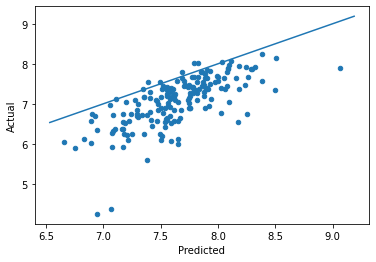

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xbar = np.exp(result1.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result1.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

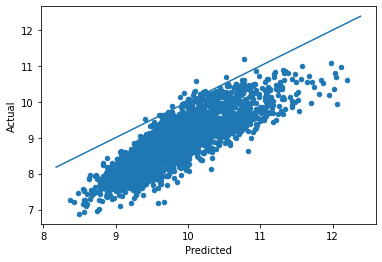

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xbar = np.exp(result4.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result4.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

In [49]:
result1.to_dataset('icrisat.ds')

<xarray.Dataset>
Dimensions:           (j: 3197, i: 9, k: 15, t: 4, m: 1, kp: 15)
Coordinates:
  * j                 (j) int64 10005 10009 10013 10022 ... 379094 379096 379127
  * t                 (t) int64 2010 2012 2015 2018
  * m                 (m) int64 1
  * i                 (i) object 'Bread' ... 'White beans'
  * k                 (k) <U9 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 51+' 'log Hsize'
  * kp                (kp) <U9 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 51+' 'log Hsize'
Data variables: (12/20)
    alpha             object None
    beta              (i) float64 0.2498 0.1508 0.1054 ... 1.201 0.2711 0.1039
    delta             (k, i) float64 -0.003088 0.2643 0.1028 ... 1.308 -0.433
    prices            object None
    characteristics   (k, j, t, m) float64 nan nan nan 0.0 ... nan nan nan 1.386
    loglambdas        (j, t, m) float64 nan nan nan nan nan ... nan nan nan nan
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              (i, t, m) float64 0.08262 0.1346 ... 0.07711 0.08249
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 nan nan nan 0.0 ... nan nan nan 1.386

### Nutritional Data

In [50]:
fdc_table = '1ed8FASRCkN9KwTWTvMzKT6UT4jWbSSZQEwZEmXCt8IQ'

fdc_codes = read_sheets(Nigeria,sheet="Sheet1")

consumption = read_sheets(nigeria_consumption,sheet='Consumption')

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


WorksheetNotFound: Consumption

In [ ]:
import fooddatacentral as fdc

apikey = 'MfcTfizjo11bsqJeJCn9Tb7RdKPQxJRjJSvTKElr'

food_nutrients = {}
for f in fdc_codes['Food description'].to_list():
    fdc_id = fdc_codes[fdc_codes['Food description'] == f]['USDA FDC ID'].values[0]
    if not np.isnan(fdc_id):
        try:
            fdc_id = int(fdc_id)
            food_nutrients[f] = fdc.nutrients(apikey, fdc_id).Quantity
        except AttributeError:
            warnings.warn("Couldn't find FDC Code %s for food %s." % (f, fdc_id))

nutritional_df = pd.DataFrame(food_nutrients,dtype=float)

In [ ]:
dri_mins_sheet = '1XJRHTnxNJwrUXperIhwrwDp1HcVxPEVoQobYDmjg9Qw'

dri_mins = read_sheets(dri_mins_sheet,sheet='diet_minimums')
dri_mins = dri_mins.reset_index(drop=True).set_index('Nutrition').drop('Source', axis=1)
dri_mins